# 1) Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
from utils import nomes, decode_rle, save_dataframe_as_feather

# 2) Carregar dataset

In [47]:
dataset = pd.read_feather('train_com_imagens.feather')
dataset = dataset.sample(frac=1)
dataset

,id,class,segmentation,image,width,height
15041,case78_day18_slice_0058,large_bowel,None,.\train\case78\case78_day18\scans\slice_0058_3...,360,310
111327,case55_day18_slice_0028,stomach,None,.\train\case55\case55_day18\scans\slice_0028_2...,266,266
16002,case63_day22_slice_0133,small_bowel,None,.\train\case63\case63_day22\scans\slice_0133_2...,266,266
88796,case54_day0_slice_0110,large_bowel,36906 8 37170 12 37436 13 37701 15 37967 15 38...,.\train\case54\case54_day0\scans\slice_0110_26...,266,266
7660,case140_day10_slice_0029,stomach,None,.\train\case140\case140_day10\scans\slice_0029...,266,266
...,...,...,...,...,...,...
113589,case36_day6_slice_0012,stomach,None,.\train\case36\case36_day6\scans\slice_0012_26...,266,266
107901,case36_day6_slice_0032,stomach,None,.\train\case36\case36_day6\scans\slice_0032_26...,266,266
108661,case113_day16_slice_0099,large_bowel,32902 6 33260 9 33619 11 33977 14 34335 17 346...,.\train\case113\case113_day16\scans\slice_0099...,360,310
32948,case119_day0_slice_0037,stomach,None,.\train\case119\case119_day0\scans\slice_0037_...,360,310


## Código para converter máscara RLE para matriz de pixels

In [5]:
dataset['decoded_segmentation'] = dataset.apply(
	lambda x:
		None if x['segmentation'] is None
		else decode_rle(
			x['segmentation'],
			shape=(x['height'], x['width'])
		),
	axis=1
)
# dataset['decoded_segmentation_2'] = dataset['decoded_segmentation'].vflatten()
dataset

,id,class,segmentation,image,width,height,clusters,decoded_segmentation
55,case133_day0_slice_0093,large_bowel,32910 7 33268 15 33627 26 33985 29 34344 30 34...,.\train\case133\case133_day0\scans\slice_0093_...,310,310,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
59,case55_day18_slice_0113,large_bowel,3610 3 3873 10 4136 15 4400 17 4665 18 4929 20...,.\train\case55\case55_day18\scans\slice_0113_2...,266,266,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
45,case139_day14_slice_0072,small_bowel,None,.\train\case139\case139_day14\scans\slice_0072...,266,266,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None
69,case129_day24_slice_0041,large_bowel,None,.\train\case129\case129_day24\scans\slice_0041...,310,310,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",None
14,case43_day22_slice_0008,stomach,None,.\train\case43\case43_day22\scans\slice_0008_2...,266,266,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",None
...,...,...,...,...,...,...,...,...
58,case123_day20_slice_0119,large_bowel,None,.\train\case123\case123_day20\scans\slice_0119...,266,266,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",None
22,case35_day15_slice_0057,stomach,27475 5 27750 7 28024 9 28299 10 28573 12 2883...,.\train\case35\case35_day15\scans\slice_0057_2...,276,276,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
71,case19_day14_slice_0139,large_bowel,None,.\train\case19\case19_day14\scans\slice_0139_3...,310,310,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None
21,case118_day16_slice_0079,stomach,None,.\train\case118\case118_day16\scans\slice_0079...,266,266,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",None


(266, 266) 266 266
.\train\case122\case122_day18\scans\slice_0106_266_266_1.50_1.50.png


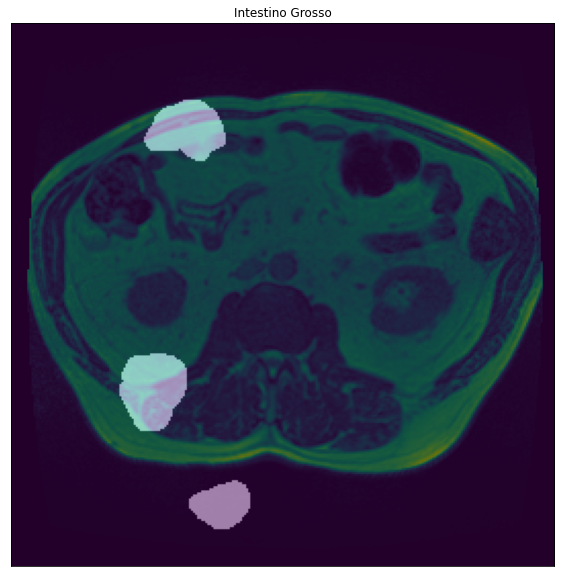

In [6]:
linha = dataset[dataset['segmentation'].notnull()].sample(1).iloc[0]
decoded_segmentation = linha['decoded_segmentation']

print(decoded_segmentation.shape, linha['width'], linha['height'])

# Ajustar se matriz tiver invertido largura com altura
if (
	decoded_segmentation.shape[0] != linha['height'] and
	decoded_segmentation.shape[1] != linha['width']
):
	decoded_segmentation = decoded_segmentation.reshape(linha['width'], linha['height'])
	print('>', decoded_segmentation.shape, linha['width'], linha['height'])

# Desenhar
fig = plt.figure(figsize=(10, 10))
fig.patch.set_alpha(1)

plt.imshow(plt.imread(linha['image']))
plt.imshow(decoded_segmentation, alpha=0.5, cmap='gray')

print(linha['image'])
plt.title(nomes[linha['class']])
plt.xticks([])
plt.yticks([])
plt.show()

In [41]:
# dataset.sample(10).apply(lambda x: (plt.imread(x['image']).shape, x['width'], x['height']), axis=1)

def w(linha):
	return (plt.imread(linha['image']).shape[1])

def h(linha):
	return (plt.imread(linha['image']).shape[0])

dataset['width'] = dataset.apply(w, axis=1)
dataset['height'] = dataset.apply(h, axis=1)
dataset
# 115448

,id,class,segmentation,image,width,height
32667,case30_day0_slice_0093,small_bowel,None,.\train\case30\case30_day0\scans\slice_0093_26...,266,266
103994,case54_day30_slice_0058,small_bowel,27033 4 27296 9 27560 13 27824 17 28089 19 281...,.\train\case54\case54_day30\scans\slice_0058_2...,266,266
63904,case18_day19_slice_0108,large_bowel,49948 6 50306 10 50665 12 51025 13 51385 13 51...,.\train\case18\case18_day19\scans\slice_0108_3...,360,310
26458,case88_day0_slice_0086,large_bowel,21431 21 21790 24 21834 12 22150 62 22509 64 2...,.\train\case88\case88_day0\scans\slice_0086_36...,360,310
87403,case74_day0_slice_0005,large_bowel,None,.\train\case74\case74_day0\scans\slice_0005_26...,266,266
...,...,...,...,...,...,...
37823,case2_day3_slice_0064,small_bowel,27841 7 28106 10 28371 12 28636 17 28668 10 28...,.\train\case2\case2_day3\scans\slice_0064_266_...,266,266
5096,case144_day15_slice_0069,stomach,28301 9 28565 14 28830 20 29095 23 29361 25 29...,.\train\case144\case144_day15\scans\slice_0069...,266,266
15655,case18_day25_slice_0012,small_bowel,None,.\train\case18\case18_day25\scans\slice_0012_3...,360,310
55782,case145_day0_slice_0042,stomach,None,.\train\case145\case145_day0\scans\slice_0042_...,360,310


In [43]:
# dataset.sample(10).apply(lambda x: (plt.imread(x['image']).shape, x['width'], x['height']), axis=1)
dataset

,id,class,segmentation,image,width,height
32667,case30_day0_slice_0093,small_bowel,None,.\train\case30\case30_day0\scans\slice_0093_26...,266,266
103994,case54_day30_slice_0058,small_bowel,27033 4 27296 9 27560 13 27824 17 28089 19 281...,.\train\case54\case54_day30\scans\slice_0058_2...,266,266
63904,case18_day19_slice_0108,large_bowel,49948 6 50306 10 50665 12 51025 13 51385 13 51...,.\train\case18\case18_day19\scans\slice_0108_3...,360,310
26458,case88_day0_slice_0086,large_bowel,21431 21 21790 24 21834 12 22150 62 22509 64 2...,.\train\case88\case88_day0\scans\slice_0086_36...,360,310
87403,case74_day0_slice_0005,large_bowel,None,.\train\case74\case74_day0\scans\slice_0005_26...,266,266
...,...,...,...,...,...,...
37823,case2_day3_slice_0064,small_bowel,27841 7 28106 10 28371 12 28636 17 28668 10 28...,.\train\case2\case2_day3\scans\slice_0064_266_...,266,266
5096,case144_day15_slice_0069,stomach,28301 9 28565 14 28830 20 29095 23 29361 25 29...,.\train\case144\case144_day15\scans\slice_0069...,266,266
15655,case18_day25_slice_0012,small_bowel,None,.\train\case18\case18_day25\scans\slice_0012_3...,360,310
55782,case145_day0_slice_0042,stomach,None,.\train\case145\case145_day0\scans\slice_0042_...,360,310


In [46]:
save_dataframe_as_feather(dataset, 'train_com_imagens.feather')